In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

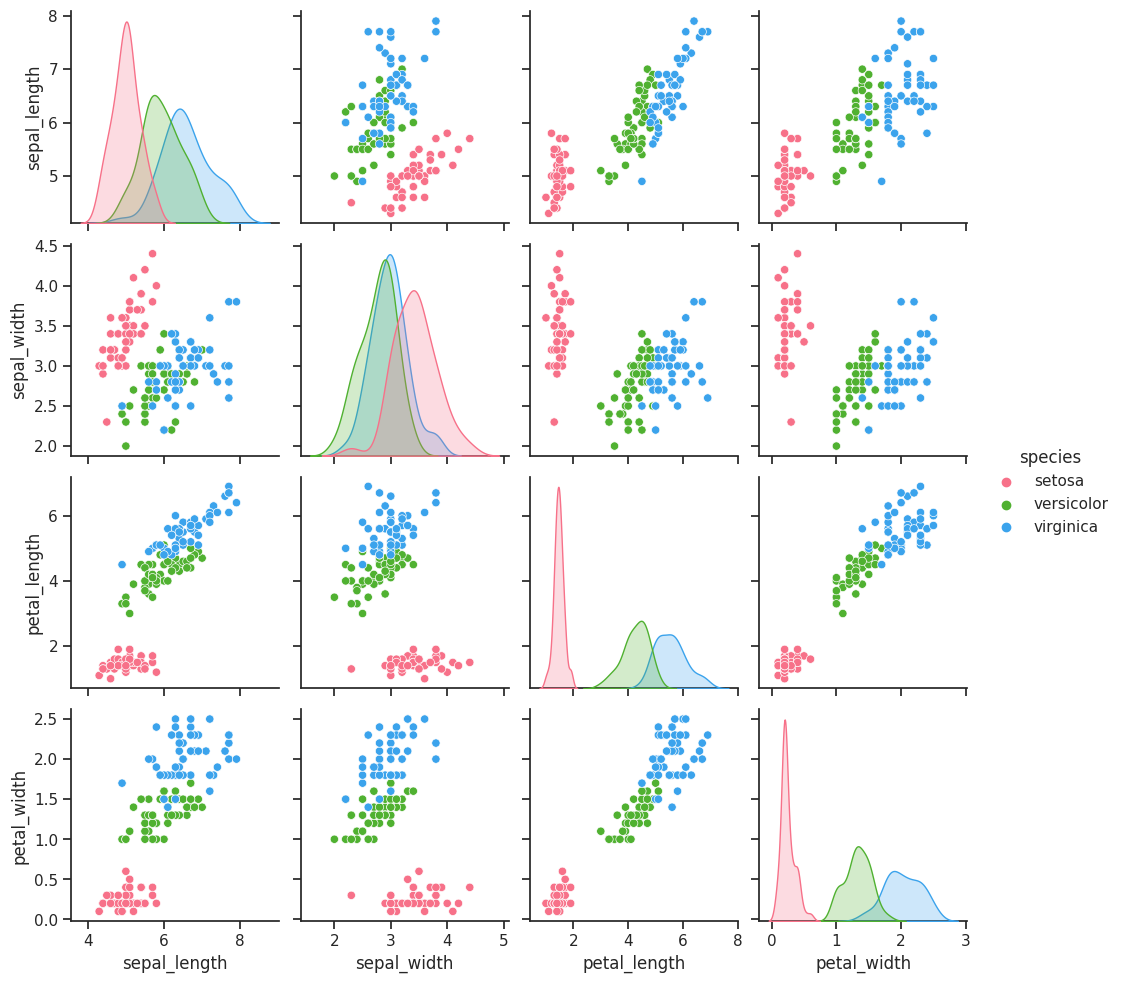

In [2]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [3]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [5]:
model = Sequential()

model.add(Dense(64, input_shape=(4,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [8]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 171ms/step - loss: 1.2048 - accuracy: 0.3917 - val_loss: 1.1397 - val_accuracy: 0.5333
Epoch 2/100
4/4 [==============================] - 0s 63ms/step - loss: 0.9987 - accuracy: 0.6500 - val_loss: 0.9958 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 0s 61ms/step - loss: 0.9133 - accuracy: 0.6333 - val_loss: 0.9422 - val_accuracy: 0.5333
Epoch 4/100
4/4 [==============================] - 0s 48ms/step - loss: 0.8630 - accuracy: 0.6833 - val_loss: 0.8728 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 0.8100 - accuracy: 0.6917 - val_loss: 0.8210 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 39ms/step - loss: 0.7706 - accuracy: 0.6917 - val_loss: 0.7744 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 28ms/step - loss: 0.7169 - accuracy: 0.6917 - val_loss: 0.7449 - val_accuracy: 0.5667
Epoch 8/100
4/4 [==

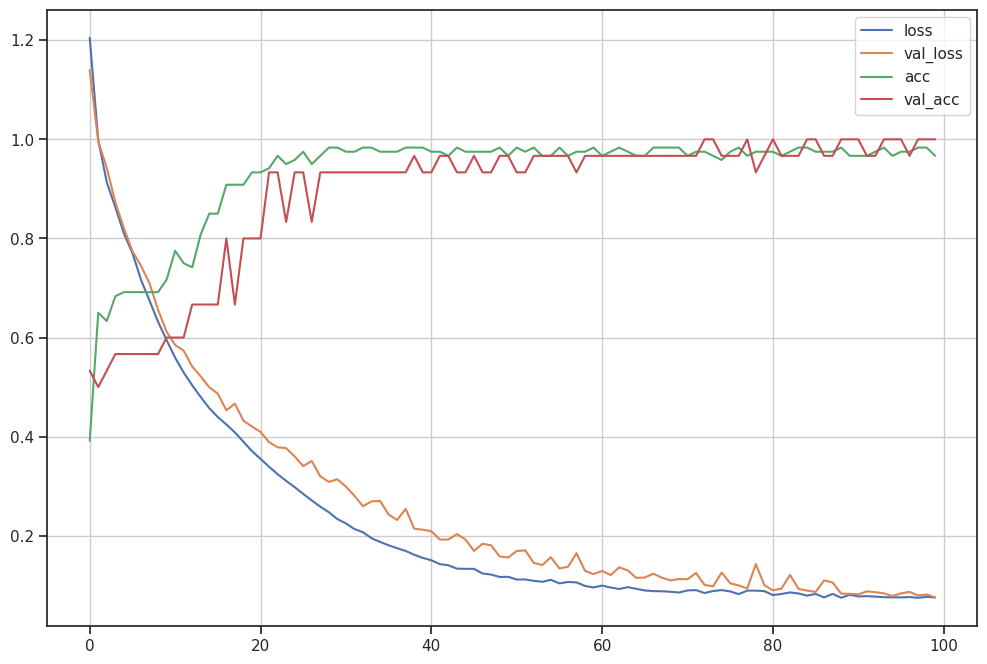

In [9]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

실제 경우에서 train의 loss, accuracy는 개선되지만, valid는 개선되지 않는 경우가 있음
- 과적합되어 있지 않은지
-

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 144ms/step - loss: 0.0756 - accuracy: 1.0000
Accuracy = 1.00


In [11]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

1/1 [==============================] - 0s 169ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [12]:
#모델 저장
model.save('model_test.hdf5')

In [ ]:
#모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('model_test.hdf5')

In [ ]:
#모델 성능 재확인
loss_n, accuracy_n = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_n:.4f}")
print(f"Test Accuracy: {accuracy_n:.4f}")